torch.Size([256, 256])


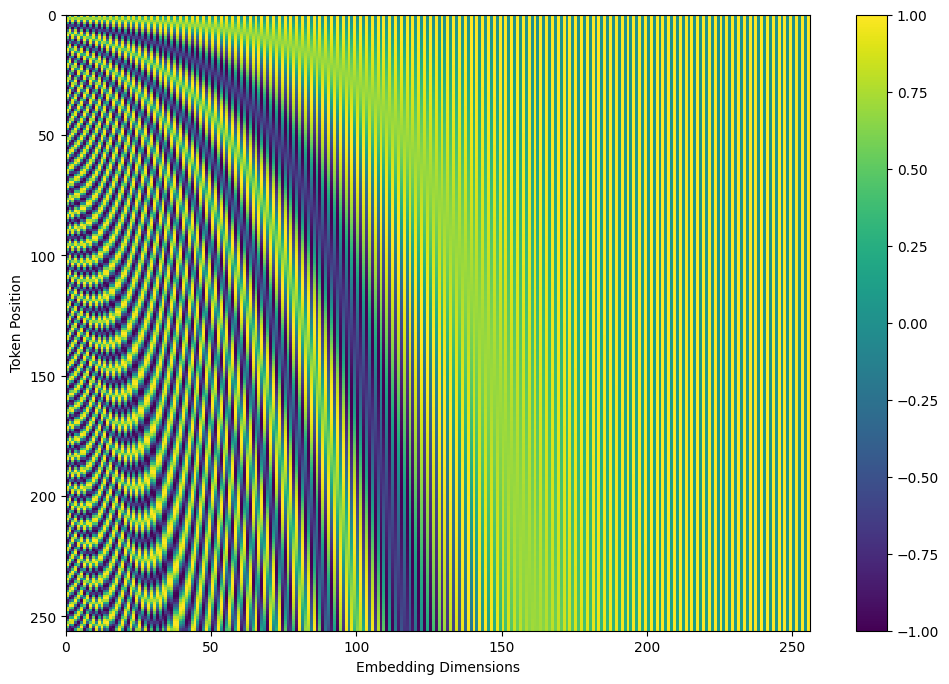

In [9]:
import random
import torch
import matplotlib.pyplot as plt
import Project_Model.Libs.Embedder as Embedder

# set a fixed seed
torch.manual_seed(0)
random.seed(0)

TOKENS = 256
DIMENSIONS = 256

# Custom code made by Christian Risi and Giuseppe Gassi
TENSOR = Embedder.fixed_positional_encoding(TOKENS, DIMENSIONS)
# print(TENSOR)


# Code taken from
#   https://github.com/jalammar/jalammar.github.io/blob/master/notebookes/transformer/transformer_positional_encoding_graph.ipynb
#   to test for correctness of custom code
print (TENSOR.shape)

plt.figure(figsize=(12,8))
plt.pcolormesh(TENSOR, cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim((0, DIMENSIONS))
plt.ylim((TOKENS,0))
plt.ylabel('Token Position')
plt.colorbar()
plt.show()

[[7706, 290, 756, 4270, 7357, 115, 351, 1507, 1213, 410, 3382, 317, 497, 4740, 2784, 7700], [7706, 290, 756, 4270, 7357, 115, 351, 1507, 1213, 410, 3382, 317, 497, 4740, 2784, 7700]]
2
torch.Size([2, 16, 256])
tensor([[[-0.6981,  0.0804, -2.1672,  ...,  0.3919,  0.3341,  1.0794],
         [ 2.5818, -0.2308,  0.6001,  ..., -0.0500, -0.0408, -0.9852],
         [-0.6967,  0.8109,  1.3108,  ...,  2.1693,  1.4143, -0.1236],
         ...,
         [ 2.1226,  2.5695, -1.6178,  ..., -0.0652, -0.0802,  0.1103],
         [ 0.8770, -2.4782,  0.8536,  ...,  2.0471, -1.5702,  0.7387],
         [-0.0495, -1.8601,  0.0405,  ...,  2.3944, -0.4297,  1.1141]],

        [[-0.6981,  0.0804, -2.1672,  ...,  0.3919,  0.3341,  1.0794],
         [ 2.5818, -0.2308,  0.6001,  ..., -0.0500, -0.0408, -0.9852],
         [-0.6967,  0.8109,  1.3108,  ...,  2.1693,  1.4143, -0.1236],
         ...,
         [ 2.1226,  2.5695, -1.6178,  ..., -0.0652, -0.0802,  0.1103],
         [ 0.8770, -2.4782,  0.8536,  ...,  2.0471

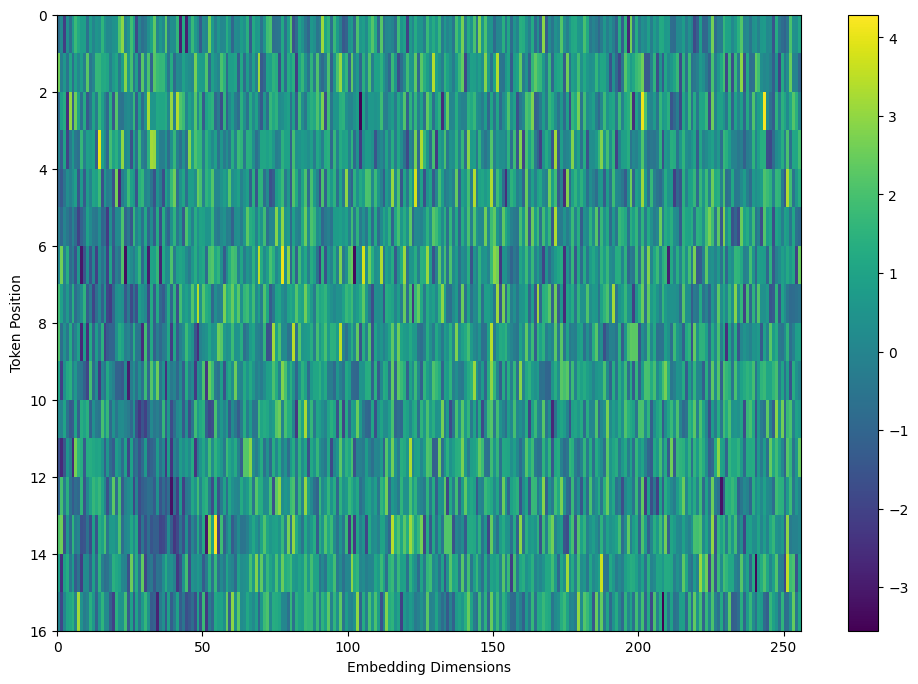

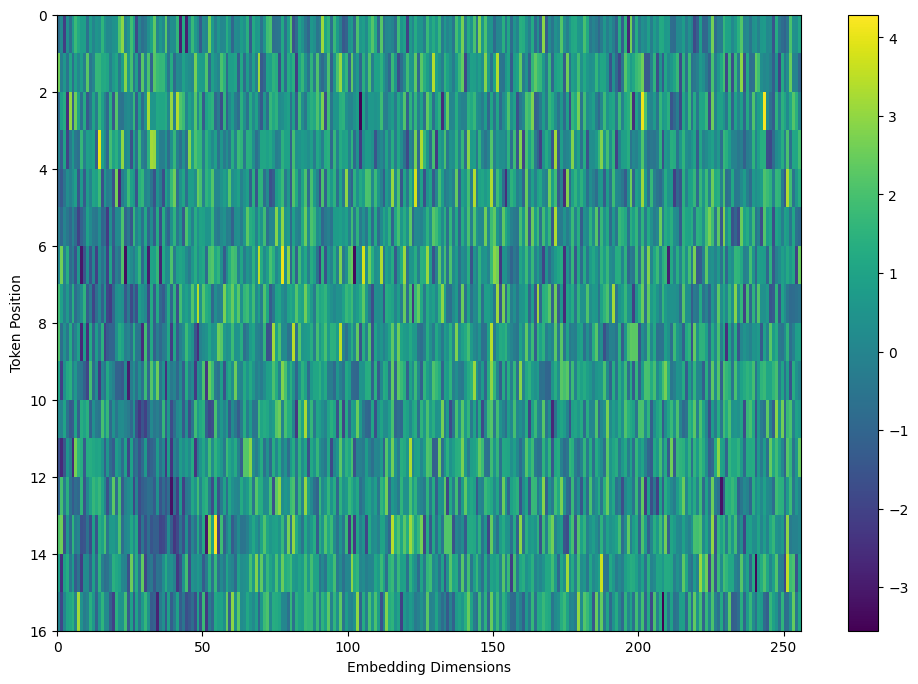

In [10]:
from pathlib import Path
import Project_Model.Libs.BPE as BPE

TEXT = "<ABS>The Dark Knight is a 2008 superhero film directed by Christopher Nolan,<SOTL>"

VOCABULARY_PATH = Path("Assets/Model/toy_10/toy_dictionary.json")
SPECIAL_VOC = BPE.default_special_tokens()

VOCABULARY = BPE.load_nanos_vocabulary(VOCABULARY_PATH)
TOKENANO = BPE.TokeNanoCore(
    VOCABULARY,
    SPECIAL_VOC
)

TOKENIZATION = [TOKENANO.encode(TEXT), TOKENANO.encode(TEXT)]
print(TOKENIZATION)

TOKEN_SPACE_SIZE = TOKENANO.vocabulary_size
EMBEDDED_SIZE = 256

EMBEDDER = Embedder.NanoSocratesEmbedder(TOKEN_SPACE_SIZE, EMBEDDED_SIZE)
TENSOR: torch.Tensor = EMBEDDER(TOKENIZATION)
print(len(TOKENIZATION))
print(TENSOR.shape)

print(TENSOR)

BATCH_SIZE, TOKENS, DIMENSIONS = TENSOR.shape

for i in range(0, BATCH_SIZE):

    PLOT_TENSOR = TENSOR[i,:,:].squeeze()

    plt.figure(figsize=(12,8))
    plt.pcolormesh(PLOT_TENSOR.detach().numpy(), cmap='viridis')
    plt.xlabel('Embedding Dimensions')
    plt.xlim((0, DIMENSIONS))
    plt.ylim((TOKENS,0))
    plt.ylabel('Token Position')
    plt.colorbar()
    plt.show()
